<a href="https://colab.research.google.com/github/Harish-topper12/Deep_Learning_Assignment/blob/main/Deep_Learning_Assignment1_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries

In [1]:
# Basic Libraries for Data Handling and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests

# Machine Learning Metrics
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, roc_curve

# Tensorflow and Keras Basic Modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC

# Keras Layers and Regularizers
from keras.layers import Dense, Dropout, BatchNormalization
from keras.regularizers import l2, l1_l2, l1

# Keras Optimizers and Losses
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.losses import BinaryCrossentropy


from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, f1_score

from sklearn.neural_network import MLPClassifier

#### Import Data from url

In [2]:
# Setting the URL to fetch the diabetes dataset
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"

# Reading the dataset from the URL into a pandas DataFrame
diabetes_data = pd.read_csv(url, sep=' ', header=None)

# Displaying the top rows of the fetched data for a quick overview
diabetes_data.head()

,0,1,2,3,4,5,6,7,8,9
0,-1,1:-0.294118,2:0.487437,3:0.180328,4:-0.292929,5:-1,6:0.00149028,7:-0.53117,8:-0.0333333,NaN
1,1,1:-0.882353,2:-0.145729,3:0.0819672,4:-0.414141,5:-1,6:-0.207153,7:-0.766866,8:-0.666667,NaN
2,-1,1:-0.0588235,2:0.839196,3:0.0491803,4:-1,5:-1,6:-0.305514,7:-0.492741,8:-0.633333,NaN
3,1,1:-0.882353,2:-0.105528,3:0.0819672,4:-0.535354,5:-0.777778,6:-0.162444,7:-0.923997,8:-1,NaN
4,-1,1:-1,2:0.376884,3:-0.344262,4:-0.292929,5:-0.602837,6:0.28465,7:0.887276,8:-0.6,NaN


#### Data Cleaning

In [3]:
# Selecting the first 9 columns from the diabetes dataset
diabetes_data = diabetes_data.iloc[:, 0:9]

# Renaming the columns for better readability and understanding
diabetes_data.columns = [
    'Outcome',
    'Pregnancies',
    'Glucose',
    'BloodPressure',
    'SkinThickness',
    'Insulin',
    'BMI',
    'DiabetesPedigreeFunction',
    'Age'
]

In [4]:
# Iterate over all columns, excluding the first one (Outcome)
for i in diabetes_data.columns[1:]:
    # Strip the first two characters from each entry in the current column
    diabetes_data[i] = diabetes_data[i].str[2:]

# Iterate over all columns again, excluding the first one (Outcome)
for i in diabetes_data.columns[1:]:
    # Convert the data type of each entry in the current column to float
    diabetes_data[i] = diabetes_data[i].astype(float)

In [5]:
# Verifying the data after data cleaning
diabetes_data

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [6]:
# Concise summary of diabetes_data
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Outcome                   768 non-null    int64  
 1   Pregnancies               768 non-null    float64
 2   Glucose                   768 non-null    float64
 3   BloodPressure             768 non-null    float64
 4   SkinThickness             768 non-null    float64
 5   Insulin                   768 non-null    float64
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       759 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


##### Observation:
Age has 9 missing values so we decide to remove these 9 null values as it's a small proportion in the total dataset.

In [7]:
# Remove rows in the diabetes_data dataframe where the 'Age' column has missing (NaN) values.
# The 'inplace=True' argument modifies the original dataframe without returning a new one.
diabetes_data.dropna(subset=['Age'], inplace=True)

In [8]:
# Replace -1 with 0 for easy understanding which represents patients with no diabetes
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace({-1: 0})

#### Split Data

In [9]:
from sklearn.model_selection import train_test_split

# Splitting the data into a training set (bigtrain_set) and a test set.
# - test_size = 0.2 reserves 20% of the data for the test set.
# - stratify = diabetes_data['Outcome'] ensures that the same proportion of outcomes is preserved in both train and test sets.
# - random_state = 0 is used for reproducibility of the exact same train/test split.
bigtrain_set, test_set = train_test_split(diabetes_data, test_size=0.2, stratify=diabetes_data['Outcome'], random_state=0)

# Extracting the features (X) and target variable (y) from the bigtrain_set.
X_train = bigtrain_set.drop('Outcome', axis=1)
y_train = bigtrain_set['Outcome']

# Extracting the features (X) and target variable (y) from the test_set. This will be used for model evaluation later.
X_test = test_set.drop('Outcome', axis=1)
y_test = test_set['Outcome']

##### Reason for Data Splitting before doing EDA:
Splitting a dataset before EDA helps to prevent data leakage, ensuring that insights and decisions made during EDA do not unintentionally bias the midelling process by using knowledge from the test set.

##### Summary of Dataset Split: Number of Samples and Label Distribution

In [10]:
# Display the number of samples in each dataset
print("Number of samples in training set:", X_train.shape[0])
#print("Number of samples in validation set:", X_val.shape[0])
print("Number of samples in test set:", X_test.shape[0])
print()

# Display the distribution of labels in each dataset
print("Label distribution in training set:\n", y_train.value_counts(normalize=True).round(3))
print()
# print("Label distribution in validation set:\n", y_val.value_counts(normalize=True).round(3))
# print()
print("Label distribution in test set:\n", y_test.value_counts(normalize=True).round(3))

Number of samples in training set: 607
Number of samples in test set: 152

Label distribution in training set:
 1    0.654
0    0.346
Name: Outcome, dtype: float64

Label distribution in test set:
 1    0.651
0    0.349
Name: Outcome, dtype: float64


##### Observations:

As dataset is imbalanced so we consider balanced accuracy instead of accuracy.


#### Exploratory Data Analysis(EDA)

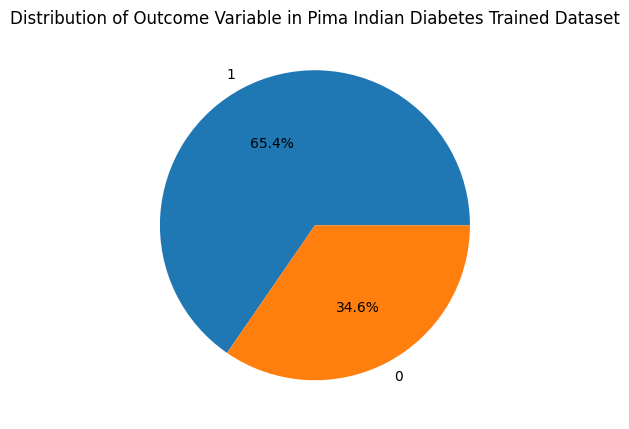

In [11]:
import matplotlib.pyplot as plt

# Extract the frequency counts for the 'Outcome' column in the training set
outcome_counts = y_train.value_counts()

# Initialize a plot of specified size
plt.figure(figsize=(5, 7))

# Create a pie chart of the outcome distribution with percentage labels
outcome_counts.plot.pie(autopct="%.1f%%")

# Set the title for the pie chart
plt.title('Distribution of Outcome Variable in Pima Indian Diabetes Trained Dataset')

# Remove the redundant y-label, as the information is implicit in a pie chart
plt.ylabel('')

# Display the pie chart
plt.show()


##### Distribution of Features in the Pima Indians Diabetes Dataset

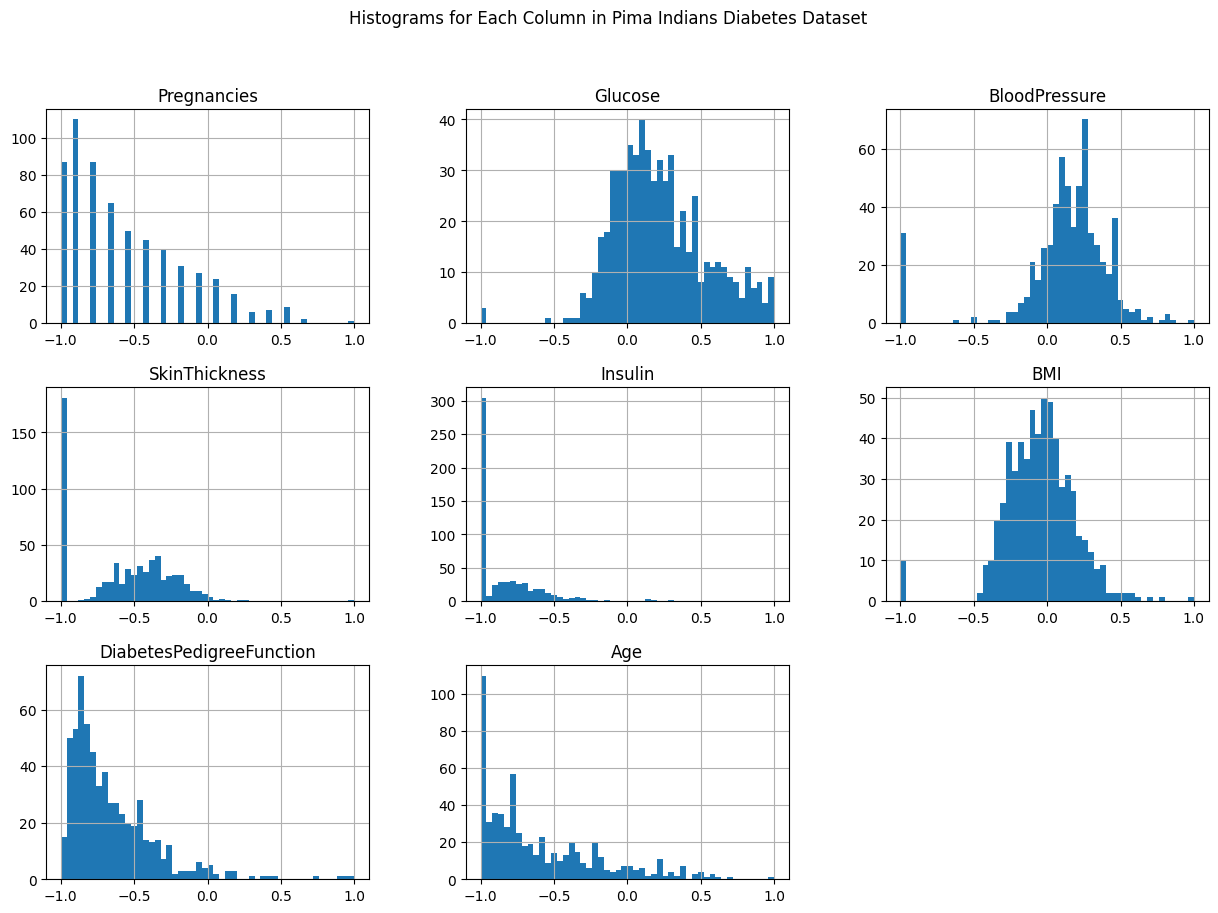

In [12]:
X_train.hist(figsize=(15, 10), bins=50)
plt.suptitle("Histograms for Each Column in Pima Indians Diabetes Dataset")
plt.show()

##### Observations:
1. From Histogram, I have seen Age, DiabetesPedigreeFunction is right skewed.
3. Blood pressure, BMI has outlier at -1.(10 values)
4. Glucose has outlier at -1 of 5 values.

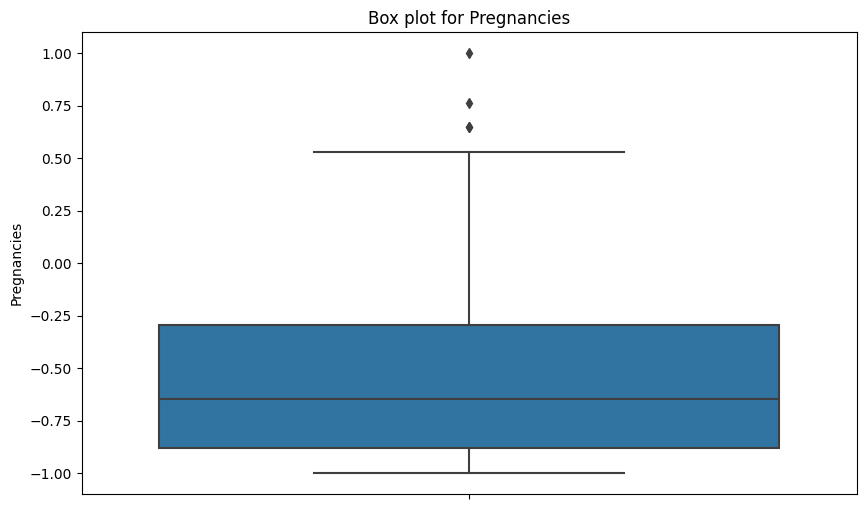

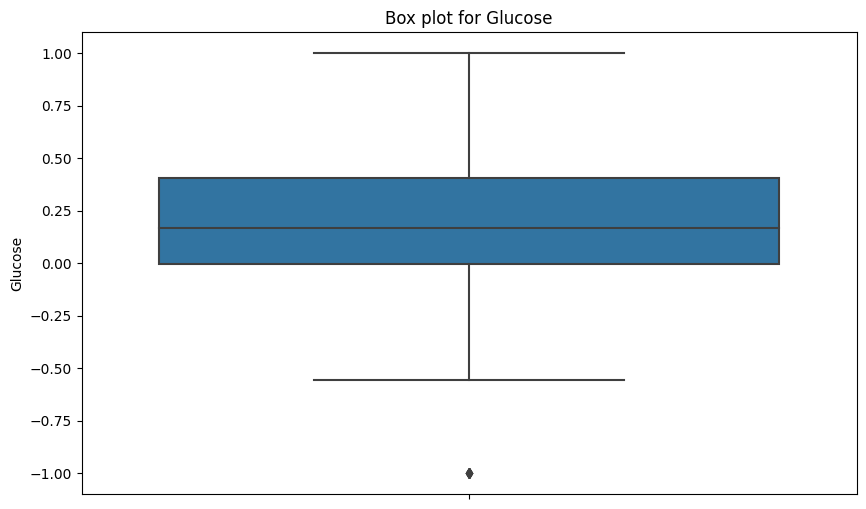

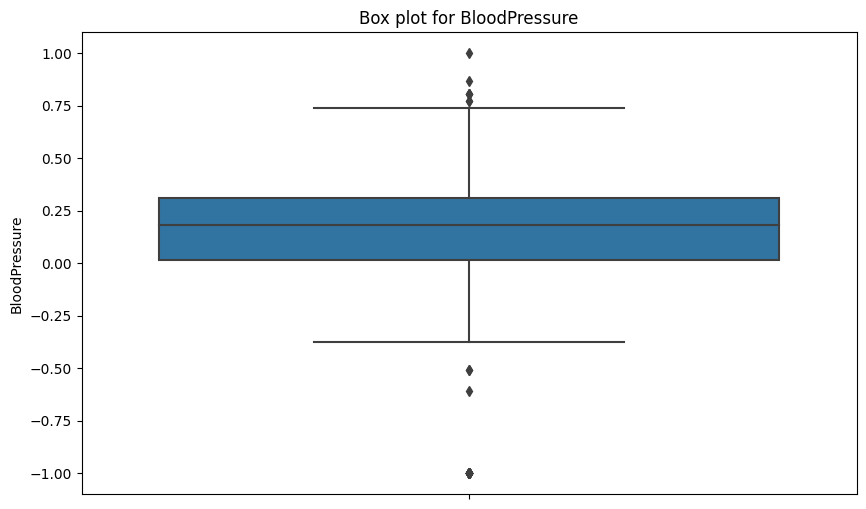

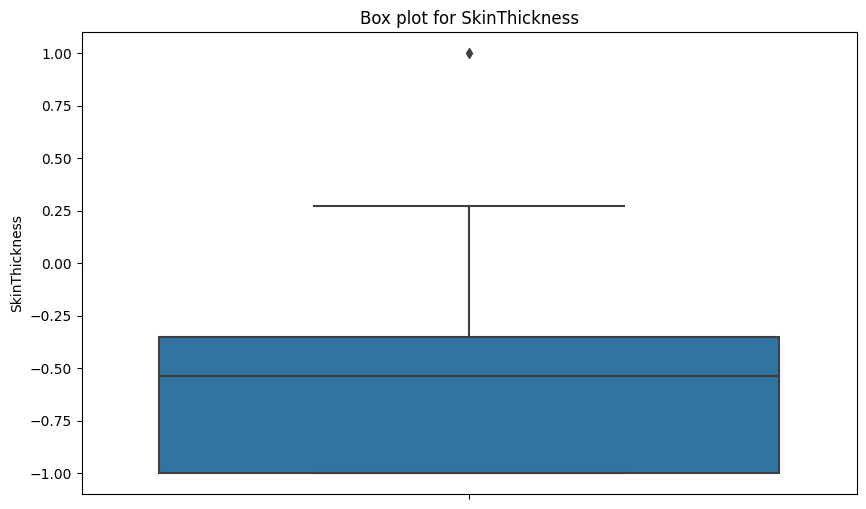

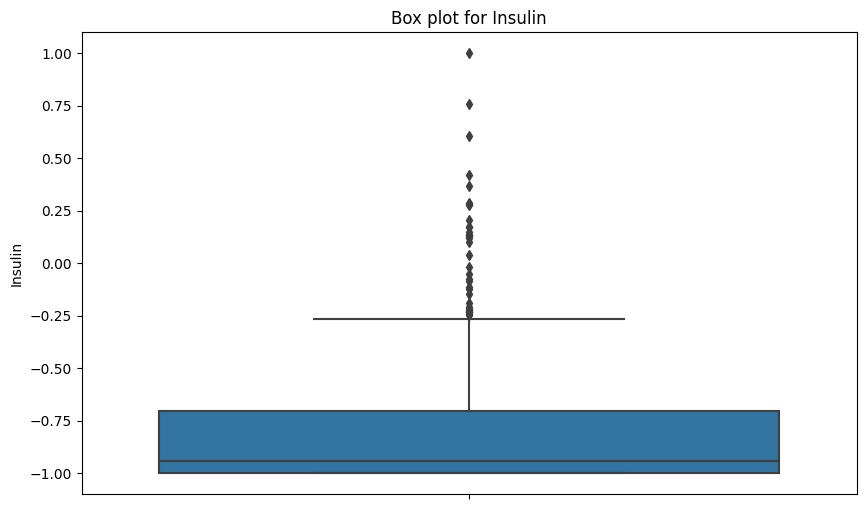

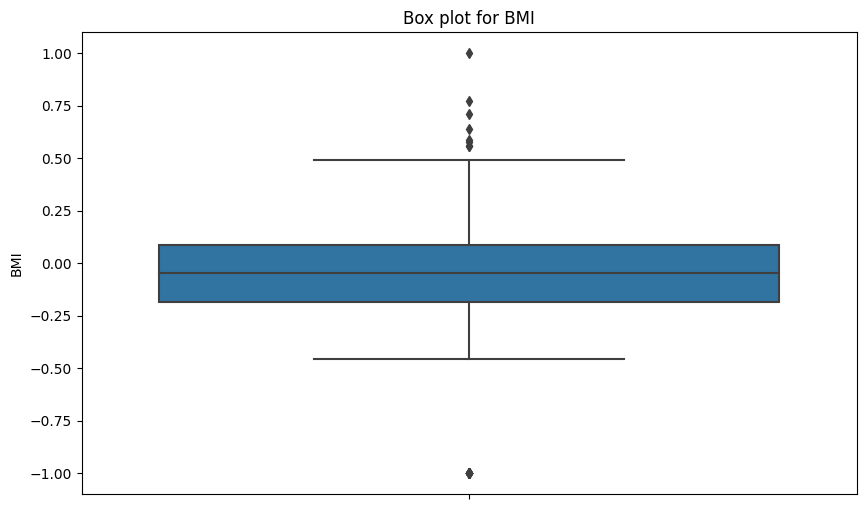

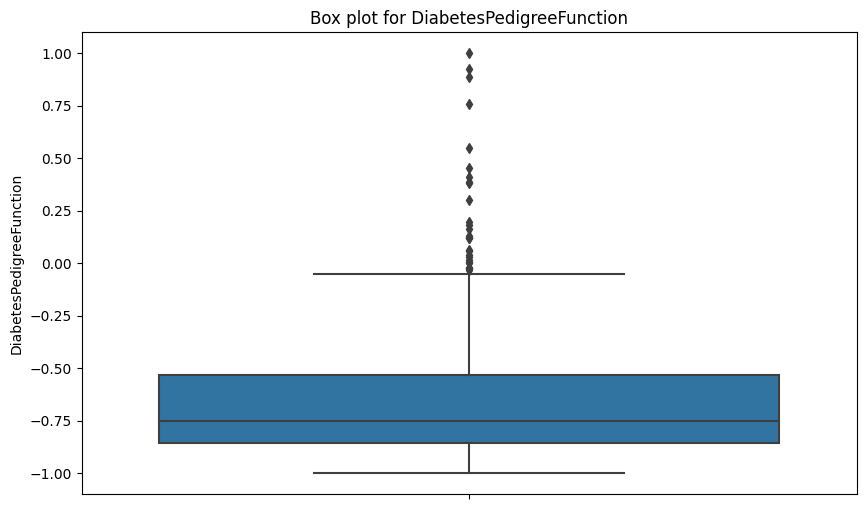

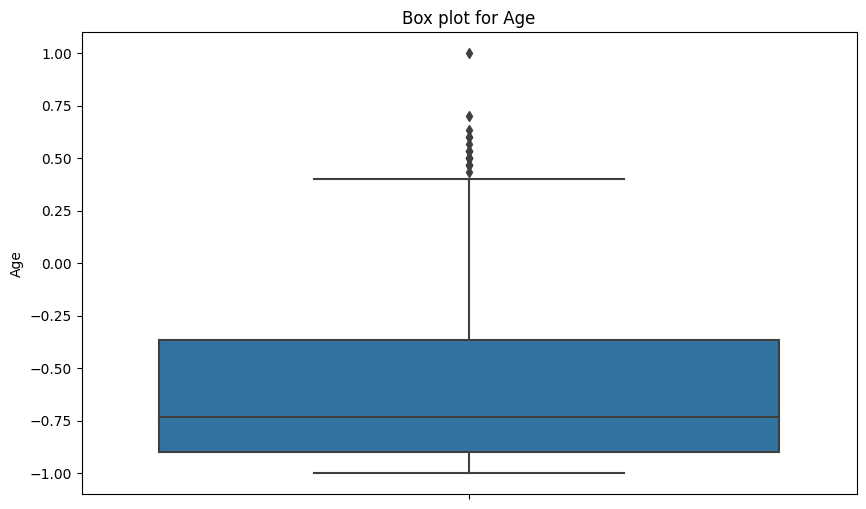

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each column in the dataframe
for column in diabetes_data.columns[1:]:

    # Initialize a new figure for each column
    plt.figure(figsize=(10, 6))

    # Create a box plot for the current column
    sns.boxplot(y=diabetes_data[column])

    # Set title for the plot
    plt.title(f'Box plot for {column}')

    # Display the plot
    plt.show()

#### Observations:
Outliers that we have guessed from the 2nd, 3rd observations of histogram are confirmed. Although, there are other outliers we are not removing them since removing those outliers impacts the training and test accuracy.

##### Approaches based on Box-plot and Histogram:
1. BMI, Glucose, BloodPressure has outlier at -1 and of 5-10 values so we replace those with either median values or remove rows but I am replacing with median values.



In [14]:
cols_to_replace_median = ['BMI', 'Glucose', 'BloodPressure']

for col in cols_to_replace_median:
    median = X_train[col][X_train[col] != -1].median()  # Calculate median excluding -1 values
    X_train[col] = X_train[col].replace(-1, median)

In [15]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 164 to 126
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               607 non-null    float64
 1   Glucose                   607 non-null    float64
 2   BloodPressure             607 non-null    float64
 3   SkinThickness             607 non-null    float64
 4   Insulin                   607 non-null    float64
 5   BMI                       607 non-null    float64
 6   DiabetesPedigreeFunction  607 non-null    float64
 7   Age                       607 non-null    float64
dtypes: float64(8)
memory usage: 42.7 KB


#### Ranking Features by Correlation with Diabetes Outcome in PIMA Dataset

In [16]:
# Combine the features and target to create a temporary training dataset
temp_train_data = X_train.copy()
temp_train_data['Outcome'] = y_train

# Calculate the correlation matrix
correlation_matrix = temp_train_data.corr()

# Extract correlations with the 'Outcome' column and sort them
correlations_with_target = correlation_matrix['Outcome'].sort_values(ascending=False)

# Print a message to indicate the purpose of the following output
print("Correlation of Features with the 'Outcome' Variable in PIMA Dataset:")
print("----------------------------------------------------------------------")
print(correlations_with_target)

Correlation of Features with the 'Outcome' Variable in PIMA Dataset:
----------------------------------------------------------------------
Outcome                     1.000000
SkinThickness              -0.047106
Insulin                    -0.119558
BloodPressure              -0.150071
DiabetesPedigreeFunction   -0.168979
Pregnancies                -0.246734
Age                        -0.270593
BMI                        -0.276801
Glucose                    -0.501839
Name: Outcome, dtype: float64


#### Function to calculate Metrics

In [17]:
def evaluate_model(model_name, model, X, y, dataset_name="Test"):
    """
    Evaluates a trained model using test data and displays metrics.

    Parameters:
    - model_name: Name/identifier of the model being used
    - model: Trained model
    - X, y: Data and labels
    - dataset_name: Name of the dataset being evaluated (default is "Test")

    Returns:
    - Dictionary of Balanced Accuracy, F1 Score, AUC, and ROC Curve Data
    """
    # Predictions
    y_pred = model.predict(X)

    if model_name == 'Baseline Perceptron' or model_name == 'Optimized Perceptron':
        y_pred_prob = model.decision_function(X)
    else:
        y_pred_prob = model.predict_proba(X)[:, 1]  # get the probability of the positive class

    # Compute metrics
    b_accuracy = balanced_accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    auc = roc_auc_score(y, y_pred_prob)

    # Get ROC Curve data
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)

    print(f"{model_name} Metrics for {dataset_name} data:")
    print(f"Balanced Accuracy: {b_accuracy:.2f}")
    print(f"f1_score: {f1:.2f}")
    print(f"AUC: {auc:.2f}")

    # Return metrics and ROC Curve data in dictionary
    return {
        "Balanced Accuracy": "{:.2f}".format(b_accuracy),
        "f1_score": "{:.2f}".format(f1),
        "AUC": "{:.2f}".format(auc),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds
    }

#### Baseline Perceptron

In [18]:
from sklearn.linear_model import Perceptron
# Create a Perceptron instance
ppn = Perceptron()

# Fit the Perceptron to your training data
ppn.fit(X_train, y_train)

Perceptron()

#### Training Metric Evaluation for Baseline Perceptron:

In [35]:
# Evaluate the Baseline Perceptron model on the training data
ppn_train_metrics = evaluate_model('Baseline Perceptron', ppn, X_train, y_train, dataset_name="Train")

# Display the evaluation metrics for the training data
ppn_train_metrics

NotFittedError: ignored

#### Test Metric Evaluation for Baseline Perceptron:

In [34]:
# Evaluate the Baseline Perceptron model on the test data
ppn_test_metrics = evaluate_model('Baseline Perceptron', ppn, X_test, y_test, dataset_name="Test")

# Display the evaluation metrics for the test data
ppn_test_metrics

NotFittedError: ignored

#### Hyperparameter Optimization for Perceptron Using Grid Search

In [21]:
# Define the parameter grid
param_grid = {
    'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 3000, 5000, 7000, 10000, 15000],
    'early_stopping': [True, False],
    'penalty': [None, 'l1', 'l2', 'elasticnet'],
    'tol': [1e-3, 1e-4, 1e-5],
    'random_state': [0]
}

# Initialize Perceptron
ppn = Perceptron()

# Use GridSearchCV
grid_search = GridSearchCV(ppn, param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Extract the best estimator and parameters
best_ppn = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:")
print(best_params)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters:
{'alpha': 0.0001, 'early_stopping': True, 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0, 'tol': 0.001}


In [22]:
best_ppn

Perceptron(early_stopping=True, penalty='l2')

#### Training Metric Evaluation for optimized Perceptron:

In [23]:
best_ppn_train_metrics = evaluate_model('Optimized Perceptron', best_ppn, X_train, y_train, dataset_name="Train")
best_ppn_train_metrics

Optimized Perceptron Metrics for Train data:
Balanced Accuracy: 0.75
f1_score: 0.77
AUC: 0.84


{'Balanced Accuracy': '0.75',
 'f1_score': '0.77',
 'AUC': '0.84',
 'FPR': array([0.        , 0.        , 0.        , 0.0047619 , 0.0047619 ,
        0.00952381, 0.00952381, 0.01428571, 0.01428571, 0.01904762,
        0.01904762, 0.02380952, 0.02380952, 0.02857143, 0.02857143,
        0.03333333, 0.03333333, 0.03809524, 0.03809524, 0.04285714,
        0.04285714, 0.04761905, 0.04761905, 0.05238095, 0.05238095,
        0.06190476, 0.06190476, 0.06666667, 0.06666667, 0.07142857,
        0.07142857, 0.07619048, 0.07619048, 0.08095238, 0.08095238,
        0.08571429, 0.08571429, 0.09047619, 0.09047619, 0.0952381 ,
        0.0952381 , 0.10952381, 0.10952381, 0.11428571, 0.11428571,
        0.11904762, 0.11904762, 0.12380952, 0.12380952, 0.12857143,
        0.12857143, 0.13809524, 0.13809524, 0.14285714, 0.14285714,
        0.14761905, 0.14761905, 0.15238095, 0.15238095, 0.16190476,
        0.16190476, 0.17142857, 0.17142857, 0.17619048, 0.17619048,
        0.18571429, 0.18571429, 0.19047619

#### Test Metric Evaluation for Optimized Perceptron:

In [24]:
# Evaluate the Optimized Perceptron model on the test data
best_ppn_test_metrics = evaluate_model('Optimized Perceptron', best_ppn, X_test, y_test, dataset_name="Test")

# Display the evaluation metrics for the test data
best_ppn_test_metrics

Optimized Perceptron Metrics for Test data:
Balanced Accuracy: 0.72
f1_score: 0.77
AUC: 0.81


{'Balanced Accuracy': '0.72',
 'f1_score': '0.77',
 'AUC': '0.81',
 'FPR': array([0.        , 0.        , 0.01886792, 0.01886792, 0.03773585,
        0.03773585, 0.05660377, 0.05660377, 0.0754717 , 0.0754717 ,
        0.09433962, 0.09433962, 0.11320755, 0.11320755, 0.1509434 ,
        0.1509434 , 0.16981132, 0.16981132, 0.18867925, 0.18867925,
        0.22641509, 0.22641509, 0.24528302, 0.24528302, 0.28301887,
        0.28301887, 0.30188679, 0.30188679, 0.32075472, 0.32075472,
        0.35849057, 0.35849057, 0.37735849, 0.37735849, 0.39622642,
        0.39622642, 0.45283019, 0.45283019, 0.47169811, 0.47169811,
        0.49056604, 0.49056604, 0.50943396, 0.50943396, 0.52830189,
        0.52830189, 0.58490566, 0.58490566, 0.62264151, 0.62264151,
        0.75471698, 0.75471698, 0.77358491, 0.77358491, 0.8490566 ,
        0.8490566 , 0.96226415, 0.96226415, 0.98113208, 0.98113208,
        1.        ]),
 'TPR': array([0.        , 0.01010101, 0.01010101, 0.24242424, 0.24242424,
        0.363

Comparing with the baseline, we observe a 0.13 increase in balanced accuracy and a 0.09 enhancement in the f1 score.

#### Training a Multi-Layer Perceptron Classifier with Specified Hyperparameters

In [25]:

# Initialize the MLPClassifier with specified hyperparameters
mlp_clf = MLPClassifier(
    solver="adam",          # Optimizer to use for weight optimization
    max_iter=10000,          # Maximum number of iterations for the solver to converge
    activation="relu",      # Activation function for the hidden layer
    hidden_layer_sizes=(6,6), # Number of neurons in the hidden layer
    alpha=0.01,             # Regularization parameter
    batch_size=64,          # Size of minibatches for stochastic solvers
    learning_rate_init=0.001, # Initial learning rate for weight optimization
    random_state=2,         # Random seed for reproducibility
)

# Train the MLPClassifier on the training data
mlp_clf.fit(X_train, y_train.values.ravel())

MLPClassifier(alpha=0.01, batch_size=64, hidden_layer_sizes=(6, 6),
              max_iter=10000, random_state=2)

#### Training Metric Evaluation for MLP:

In [26]:
mlp_train_metrics = evaluate_model('MLP', mlp_clf, X_train, y_train, dataset_name="Train")
mlp_train_metrics

MLP Metrics for Train data:
Balanced Accuracy: 0.76
f1_score: 0.85
AUC: 0.87


{'Balanced Accuracy': '0.76',
 'f1_score': '0.85',
 'AUC': '0.87',
 'FPR': array([0.        , 0.        , 0.        , 0.0047619 , 0.0047619 ,
        0.00952381, 0.00952381, 0.01428571, 0.01428571, 0.01904762,
        0.01904762, 0.02380952, 0.02380952, 0.02857143, 0.02857143,
        0.04285714, 0.04285714, 0.04761905, 0.04761905, 0.05238095,
        0.05238095, 0.05714286, 0.05714286, 0.06190476, 0.06190476,
        0.06666667, 0.06666667, 0.07142857, 0.07142857, 0.07619048,
        0.07619048, 0.08095238, 0.08095238, 0.08571429, 0.08571429,
        0.09047619, 0.09047619, 0.0952381 , 0.0952381 , 0.1       ,
        0.1       , 0.10952381, 0.10952381, 0.11904762, 0.11904762,
        0.12380952, 0.12380952, 0.12857143, 0.12857143, 0.13333333,
        0.13333333, 0.13809524, 0.13809524, 0.14285714, 0.14285714,
        0.14761905, 0.14761905, 0.15238095, 0.15238095, 0.15714286,
        0.15714286, 0.16666667, 0.16666667, 0.17142857, 0.17142857,
        0.17619048, 0.17619048, 0.19047619

#### Test Metric Evaluation for MLP:

In [27]:
mlp_test_metrics = evaluate_model('MLP', mlp_clf, X_test, y_test, dataset_name="Test")
mlp_test_metrics

MLP Metrics for Test data:
Balanced Accuracy: 0.78
f1_score: 0.86
AUC: 0.84


{'Balanced Accuracy': '0.78',
 'f1_score': '0.86',
 'AUC': '0.84',
 'FPR': array([0.        , 0.        , 0.        , 0.01886792, 0.01886792,
        0.03773585, 0.03773585, 0.0754717 , 0.0754717 , 0.09433962,
        0.09433962, 0.11320755, 0.11320755, 0.13207547, 0.13207547,
        0.1509434 , 0.1509434 , 0.16981132, 0.16981132, 0.22641509,
        0.22641509, 0.24528302, 0.24528302, 0.28301887, 0.28301887,
        0.30188679, 0.30188679, 0.32075472, 0.32075472, 0.39622642,
        0.39622642, 0.41509434, 0.41509434, 0.45283019, 0.45283019,
        0.47169811, 0.47169811, 0.50943396, 0.50943396, 0.58490566,
        0.58490566, 0.73584906, 0.73584906, 0.79245283, 0.79245283,
        1.        , 1.        ]),
 'TPR': array([0.        , 0.01010101, 0.02020202, 0.02020202, 0.23232323,
        0.23232323, 0.34343434, 0.34343434, 0.49494949, 0.49494949,
        0.62626263, 0.62626263, 0.66666667, 0.66666667, 0.72727273,
        0.72727273, 0.73737374, 0.73737374, 0.75757576, 0.75757576,
 

#### Compilation and Display of Model Evaluation Metrics

In [28]:
# Organizing the collected metrics for each model in a structured format
metrics_data = {
    # Defining the metrics names for better clarity in the table
    'Metric': ['Balanced Accuracy (Train)', 'Balanced Accuracy (Test)',
               'F1 Score (Train)', 'F1 Score (Test)',
               'AUC (Train)', 'AUC (Test)'],

    # Metrics values for the Baseline Perceptron model
    'Baseline Perceptron': [ppn_train_metrics['Balanced Accuracy'], ppn_test_metrics['Balanced Accuracy'],
                            ppn_train_metrics['f1_score'], ppn_test_metrics['f1_score'],
                            ppn_train_metrics['AUC'], ppn_test_metrics['AUC']],

    # Metrics values for the Optimized Perceptron model
    'Optimized Perceptron': [best_ppn_train_metrics['Balanced Accuracy'], best_ppn_test_metrics['Balanced Accuracy'],
                             best_ppn_train_metrics['f1_score'], best_ppn_test_metrics['f1_score'],
                             best_ppn_train_metrics['AUC'], best_ppn_test_metrics['AUC']],

    # Metrics values for the MLP model
    'MLP': [mlp_train_metrics['Balanced Accuracy'], mlp_test_metrics['Balanced Accuracy'],
            mlp_train_metrics['f1_score'], mlp_test_metrics['f1_score'],
            mlp_train_metrics['AUC'], mlp_test_metrics['AUC']]
}

# Create a DataFrame from the metrics data for easy visualization and comparison
metrics_table = pd.DataFrame(metrics_data)

# Setting the 'Metric' column as the index for better representation in the table
metrics_table = metrics_table.set_index('Metric')

# Display the formatted metrics table
metrics_table


,Baseline Perceptron,Optimized Perceptron,MLP
Metric,,,
Balanced Accuracy (Train),0.73,0.75,0.76
Balanced Accuracy (Test),0.68,0.72,0.78
F1 Score (Train),0.84,0.77,0.85
F1 Score (Test),0.81,0.77,0.86
AUC (Train),0.83,0.84,0.87
AUC (Test),0.80,0.81,0.84


#### ROC Curve Visualization for Models Evaluation

In [29]:
def plot_roc_curve(fpr_data, tpr_data, auc_data, dataset_name="Test"):
    """
    Plots the ROC curve for the three models: Perceptron, Optimized Perceptron, and MLP.

    Parameters:
    - fpr_data: Dictionary containing FPR values for the three models.
    - tpr_data: Dictionary containing TPR values for the three models.
    - auc_data: Dictionary containing AUC values for the three models.
    - dataset_name: A string indicating the dataset being used ("Train" or "Test").
    """

    plt.figure(figsize=(10, 7))

    # Plotting ROC curve for each model
    for model_name, color in zip(['Baseline Perceptron', 'Optimized Perceptron', 'MLP'], ['blue', 'green', 'red']):
        try:
            auc_value = float(auc_data[model_name])
            plt.plot(fpr_data[model_name], tpr_data[model_name], color=color,
                 label=f'{model_name} (AUC = {auc_value:.2f})')
        except ValueError:
            print(f"Cannot convert AUC value for {model_name} to float. Skipping this model.")
            continue

    # Plotting the random classifier
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC = 0.5)')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {dataset_name} Data')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


#### ROC Curves of Baseline Perceptron, Optimized Perceptron and MLP for Train Data

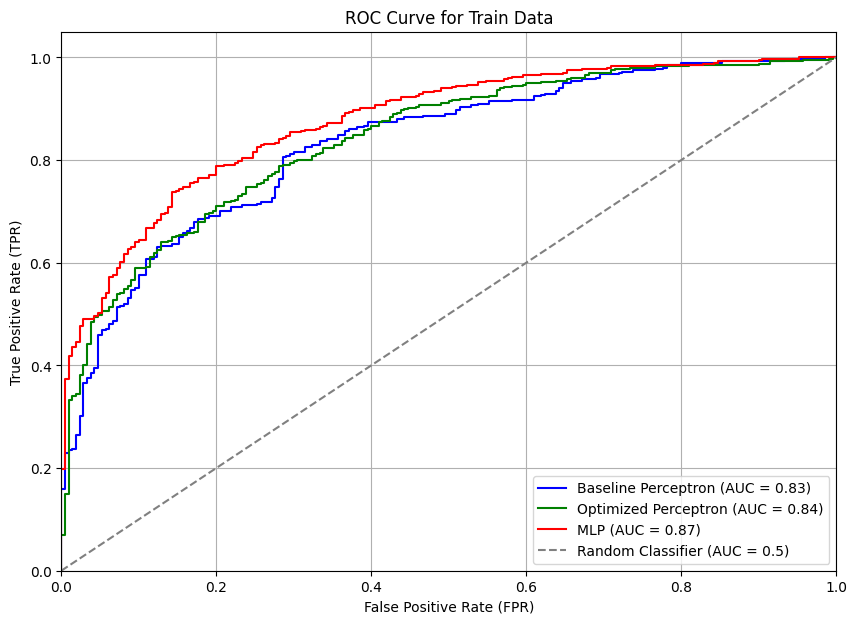

In [30]:
# For the train dataset
fpr_train_data = {
    'Baseline Perceptron': ppn_train_metrics['FPR'],
    'Optimized Perceptron': best_ppn_train_metrics['FPR'],
    'MLP': mlp_train_metrics['FPR']
}

tpr_train_data = {
    'Baseline Perceptron': ppn_train_metrics['TPR'],
    'Optimized Perceptron': best_ppn_train_metrics['TPR'],
    'MLP': mlp_train_metrics['TPR']
}

auc_train_data = {
    'Baseline Perceptron': ppn_train_metrics['AUC'],
    'Optimized Perceptron': best_ppn_train_metrics['AUC'],
    'MLP': mlp_train_metrics['AUC']
}

plot_roc_curve(fpr_train_data, tpr_train_data, auc_train_data, dataset_name="Train" )

#### ROC Curves of Baseline Perceptron, Optimized Perceptron and MLP for Test Data

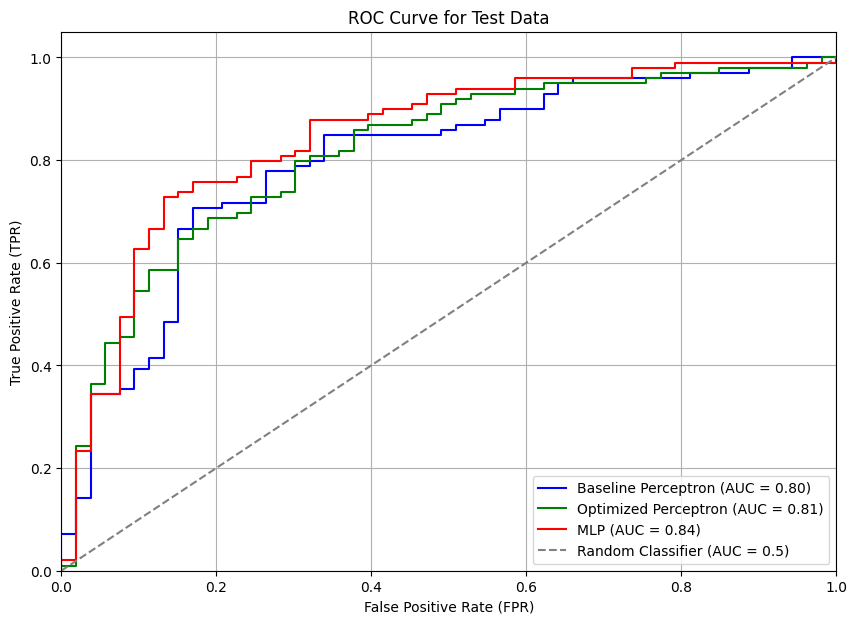

In [32]:
# Extracting the False Positive Rate (FPR) for each model using the test dataset
fpr_test_data = {
    'Baseline Perceptron': ppn_test_metrics['FPR'],
    'Optimized Perceptron': best_ppn_test_metrics['FPR'],
    'MLP': mlp_test_metrics['FPR']
}

# Extracting the True Positive Rate (TPR) for each model using the test dataset
tpr_test_data = {
    'Baseline Perceptron': ppn_test_metrics['TPR'],
    'Optimized Perceptron': best_ppn_test_metrics['TPR'],
    'MLP': mlp_test_metrics['TPR']
}

# Extracting the Area Under Curve (AUC) score for each model using the test dataset
auc_test_data = {
    'Baseline Perceptron': ppn_test_metrics['AUC'],
    'Optimized Perceptron': best_ppn_test_metrics['AUC'],
    'MLP': mlp_test_metrics['AUC']
}

# Calling the function to plot the ROC curve for the test dataset using the extracted metrics
plot_roc_curve(fpr_test_data, tpr_test_data, auc_test_data, dataset_name="Test")
